In [48]:
import pandas as pd
import os
import fnmatch
import re
from metient.util import eval_util as eutil
from metient.util import plotting_util as putil
from metient.util.globals import *

sites = ["m8", "m5"]
mig_types = ["M", "mS", "R", "S"]


x = 0
k = float("inf")
loss_thres = 0.0
suffix = "_calibrate"
mach_sim_data_dir = '/data/morrisq/divyak/projects/machina/data/sims'
predictions_data_dir = '/data/morrisq/divyak/data/metient_prediction_results/predictions_batch_exp_bs1024_calibrate_wip_new_split_r3_08062024'

gt_df = pd.read_csv("/data/morrisq/divyak/projects/metient/metient/data/machina_sims/gt_pattern.csv")
gt_df['site'] = gt_df['site'].astype(str)
gt_df['mig_type'] = gt_df['mig_type'].astype(str)
gt_df['seed'] = gt_df['seed'].astype(int)

data = []
for site in sites:
    for mig_type in mig_types:
        print(site, mig_type)
        true_site_mig_type_data_dir = os.path.join(mach_sim_data_dir, site, mig_type)
        predicted_site_mig_type_data_dir = os.path.join(predictions_data_dir, site, mig_type)
        filenames = fnmatch.filter(os.listdir(predicted_site_mig_type_data_dir), 'T_tree*.predicted.tree')
        seeds = set([int(re.findall(r'seed(\d+)', filename)[0]) for filename in filenames])
        print(seeds)
        assert(len(seeds)==10)
        for seed in seeds:
            print(site, mig_type, seed)
            gt_pattern = gt_df[(gt_df['site']==site)&(gt_df['mig_type']==mig_type)&(gt_df['seed']==seed)]['gt_pattern'].item()
            #trees = [t[t.find("tree")+4:t.find("_seed")] for t in filenames if seed == t[t.find("seed")+4:t.find(".predicted")]]
            tree_info = eutil.get_metient_min_loss_trees(predicted_site_mig_type_data_dir, seed, k, loss_thres=loss_thres, suffix=suffix)
            for loss, results_dict, met_tree_num, clone_tree_num in tree_info:
                print("clone_tree_num", clone_tree_num, "met_tree_num", met_tree_num)
                V = results_dict[OUT_LABElING_KEY][met_tree_num]
                A = results_dict[OUT_ADJ_KEY][met_tree_num]
                pattern = putil.seeding_pattern(V, A)
                pred_pattern = 'prim_only' if pattern == 'primary single-source' else 'met_to_met'
                data.append(["Metient", gt_pattern, pred_pattern])
data
                

m8 M
{35, 7, 172, 76, 45, 239, 241, 19, 243, 216}
m8 M 35
# min loss trees: 1
clone_tree_num 35 met_tree_num 0
m8 M 7
# min loss trees: 1
clone_tree_num 1 met_tree_num 0
m8 M 172
# min loss trees: 1
clone_tree_num 71 met_tree_num 0
m8 M 76
# min loss trees: 1
clone_tree_num 3 met_tree_num 0
m8 M 45
# min loss trees: 1
clone_tree_num 0 met_tree_num 0
m8 M 239
# min loss trees: 1
clone_tree_num 0 met_tree_num 0
m8 M 241
# min loss trees: 1
clone_tree_num 2 met_tree_num 0
m8 M 19
# min loss trees: 1
clone_tree_num 42 met_tree_num 0
m8 M 243
# min loss trees: 1
clone_tree_num 3 met_tree_num 0
m8 M 216
# min loss trees: 1
clone_tree_num 5 met_tree_num 0
m8 mS
{0, 2, 3, 4, 5, 7, 8, 9, 10, 12}
m8 mS 0
# min loss trees: 1
clone_tree_num 1 met_tree_num 0
m8 mS 2
# min loss trees: 1
clone_tree_num 1 met_tree_num 0
m8 mS 3
# min loss trees: 1
clone_tree_num 0 met_tree_num 0
m8 mS 4
# min loss trees: 1
clone_tree_num 4 met_tree_num 0
m8 mS 5
# min loss trees: 1
clone_tree_num 0 met_tree_num 0
m8 m

[['Metient', 'met_to_met', 'met_to_met'],
 ['Metient', 'met_to_met', 'met_to_met'],
 ['Metient', 'met_to_met', 'met_to_met'],
 ['Metient', 'met_to_met', 'met_to_met'],
 ['Metient', 'met_to_met', 'met_to_met'],
 ['Metient', 'met_to_met', 'met_to_met'],
 ['Metient', 'met_to_met', 'met_to_met'],
 ['Metient', 'met_to_met', 'met_to_met'],
 ['Metient', 'met_to_met', 'met_to_met'],
 ['Metient', 'met_to_met', 'met_to_met'],
 ['Metient', 'prim_only', 'prim_only'],
 ['Metient', 'met_to_met', 'met_to_met'],
 ['Metient', 'met_to_met', 'prim_only'],
 ['Metient', 'met_to_met', 'prim_only'],
 ['Metient', 'prim_only', 'prim_only'],
 ['Metient', 'prim_only', 'prim_only'],
 ['Metient', 'prim_only', 'prim_only'],
 ['Metient', 'met_to_met', 'met_to_met'],
 ['Metient', 'met_to_met', 'met_to_met'],
 ['Metient', 'met_to_met', 'met_to_met'],
 ['Metient', 'met_to_met', 'prim_only'],
 ['Metient', 'met_to_met', 'met_to_met'],
 ['Metient', 'met_to_met', 'met_to_met'],
 ['Metient', 'met_to_met', 'met_to_met'],
 ['

In [49]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

def make_cm(true_labels, pred_labels):

    cm = confusion_matrix(true_labels, pred_labels, labels=['prim_only', 'met_to_met'])
    accuracy = np.trace(cm) / np.sum(cm)
    print("accuracy", accuracy)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    # Plot confusion matrix
    plt.figure(figsize=(3, 3))
    sns.heatmap(cm_normalized, annot=True, fmt='.3f', cmap='Blues', cbar=False,
                )
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

In [50]:
len(data)

81

accuracy 0.7777777777777778


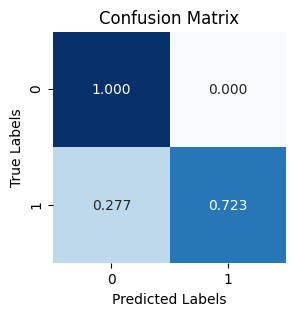

In [51]:
metient_true_labels = [item[1] for item in data]
metient_pred_labels = [item[2] for item in data]
make_cm(metient_true_labels,metient_pred_labels)

['M' 'mS' 'R' 'S']
['pS' 'pPS' 'mM' 'mS' 'mPS' 'pR' 'pM']
accuracy 0.7956656346749226


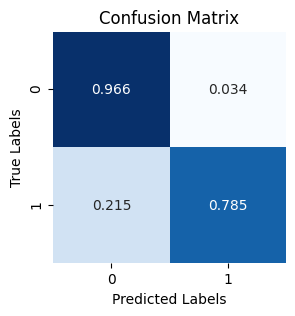

In [52]:
machina_m5_df, machina_m8_df = eutil.load_machina_results_new_split('/data/morrisq/divyak/projects/metient/metient/test/machina_simulated_data')
machina_all_df = pd.concat([machina_m5_df, machina_m8_df], axis=0)
print(machina_all_df['inferred'].unique())
machina_all_df['inferred_general'] = machina_all_df.apply(lambda row: "prim_only" if row['inferred'].endswith('PS') else "met_to_met", axis=1)
machina_all_df
make_cm(machina_all_df['new_gt_pattern'], machina_all_df['inferred_general'])
